# 0. Import libs

In [1]:
%pylab inline

import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
import time
import os
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
import plotly.graph_objs as go

#многопоточность если потребуется
from multiprocessing import Pool , Process
from multiprocessing import Manager

Populating the interactive namespace from numpy and matplotlib


In [2]:
#импортируем всякие вспомогательные библиотеки, если будет время поиграться
#а также библиотеки для отрисовки графиков
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter


from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import VotingClassifier as vc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import SGDClassifier as sgd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.linear_model import Lasso as las
from sklearn import svm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score



# load data

In [4]:
#посмотрим на комментарии ц excel файле, соответствующие столбцам
#интересно, детальная расшифровка полей
from openpyxl import Workbook
from openpyxl import load_workbook

#wb = load_workbook("data/Task_Python.xlsx",)
wb = load_workbook(r"C:\Course\xsolla\Git\Machine-learning-course-task\1_fullworkbook 2\data\Task_Python.xlsx",)
ws = wb["Train"] # or whatever sheet name

for nrow, row in enumerate(ws.rows):
    if nrow == 1:
        break
    for cell in row:
        if not cell.comment is None:
            start = str(cell.comment).find('\n') + 1
            end = str(cell.comment).find(' by П')
            print(f'{cell.value}: {str(cell.comment)[start:end]}')
del wb, ws

default: has default loan?
housing: has housing loan?
loan: has personal loan?
contact: contact communication type
month: last contact month of year 
day_of_week: last contact day of the week 
duration:  last contact duration, in seconds
campaign: number of contacts performed during this campaign 
pdays: number of days that passed by after the client was last contacted from a previous campaign  999 - was not previously contacted)
previous: number of contacts performed before this campaign 
poutcome: outcome of the previous marketing campaign 
emp.var.rate: employment variation rate - quarterly indicator 
cons.price.idx: consumer price index - monthly indicator 
cons.conf.idx: consumer confidence index - monthly indicator 
euribor3m: the rate of interest - daily indicator
nr.employed: number of employees - quarterly indicator 
y: has the client subscribed a product


In [18]:
#загрузим данные из excel посмотрим
data = pd.read_excel(r'C:\Course\xsolla\Git\Machine-learning-course-task\1_fullworkbook 2\data\Task_Python.xlsx', sheet_name='Train', nrows=3223, usecols='A:U', index_col=None)
print(data.shape)
with pd.option_context('max_columns',25):
    display(data.head())
#на всякий случай сохранил данные в csv формат, чтобы удобнее работать и проверять

(3222, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [19]:
train_directory = "C:/Course/xsolla/Git/Machine-learning-course-task/1_fullworkbook 2/data/train.csv"
test_directory = "C:/Course/xsolla/Git/Machine-learning-course-task/1_fullworkbook 2/data/test.csv"
train = pd.read_csv(train_directory, header=0 )
test = pd.read_csv(test_directory, header=0 )

train['y'] = [1 if y == 'yes' else 0 for y in train['y']]

In [20]:
#выделим категариальные признаки  и количественные признаки

cat_feats = []
num_feats = []

for feat in train.dtypes.keys():
    if train.dtypes[feat] == 'object' and feat != 'y':
        cat_feats.append(feat)
    elif feat != 'y':
        num_feats.append(feat)
        

# 6. оценка стат значимости коэффициентов

In [53]:
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

#постройте полиномиальную модель прогноза y от зависимости квадрата возраста (age) , третей степени продолжительности (duration) 
#и первой степени дней (pdays) на данных train

m1 = smf.ols('y ~ age + duration + pdays',
            data=train)
fitted = m1.fit()

#выведете саммари модели

print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     447.3
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          6.91e-243
Time:                        16:45:06   Log-Likelihood:                -296.50
No. Observations:                3222   AIC:                             601.0
Df Residuals:                    3218   BIC:                             625.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4680      0.031     15.021      0.0

# QQ график

<Figure size 1152x504 with 0 Axes>

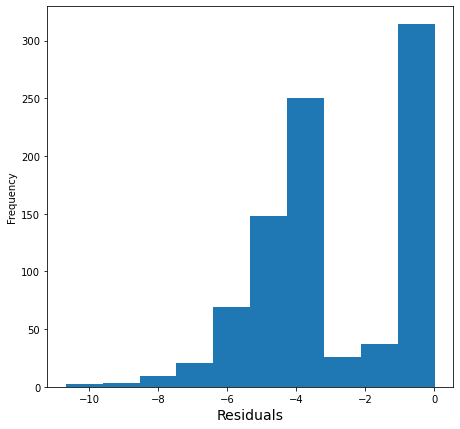

In [62]:
import scipy as sc 

#постройте QQ график и дайте его оценку, точна ли модель на созданных факторах?
#как можно улучшить модель?

plt.figure(figsize(16,7))
plt.subplots(121)
sc.stats.probplot(fitted.resid, dist='norm', plot=pylab)
plt.subplot(122)
np.log(fitted.resid).plot.hist()
plt.xlabel('Residuals', fontsize=14)
pylab.show()

((array([-3.52082115, -3.27832144, -3.14428602, ...,  3.14428602,
          3.27832144,  3.52082115]),
  array([-1.65669219, -0.91822748, -0.9160903 , ...,  0.98220812,
          0.99280527,  1.00908703])),
 (0.22561454144077778, -5.875745838476445e-16, 0.8495913643348778))

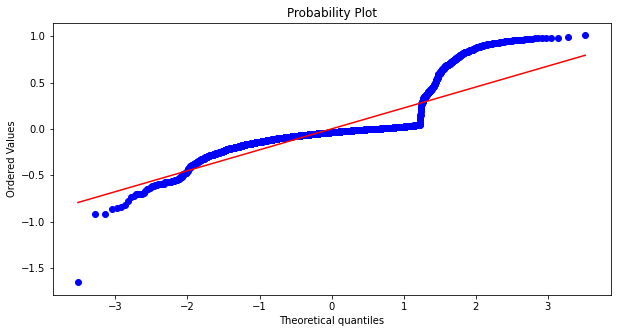

In [113]:
sc.stats.probplot(fitted.resid, dist='norm', plot=pylab)

# создание модели зависимости на основании ансамбля деревьев решений

In [97]:
#создайте модель ансамбля деревьев решений на основании количественных переменных (num_feats)
#задайте количество деревьев (n_estimators ) = 30
#зафиксируйте генератор случайных чисел (random_state) на значении 22031990

model = RandomForestClassifier(n_estimators=30, random_state=22031990)
model.fit(train[num_feats], train['y'])

RandomForestClassifier(n_estimators=30, random_state=22031990)

# Оценка качества модели для построения выводов

In [98]:
#проверьте, какое качество прогноза модели получилось на обучающих данных
#какова итоговая вероятность определения правильного значения y?
print(metrics.roc_auc_score(train['y'],model.predict(train[num_feats])))

0.994475138121547


# оценка важности признаков на таргет

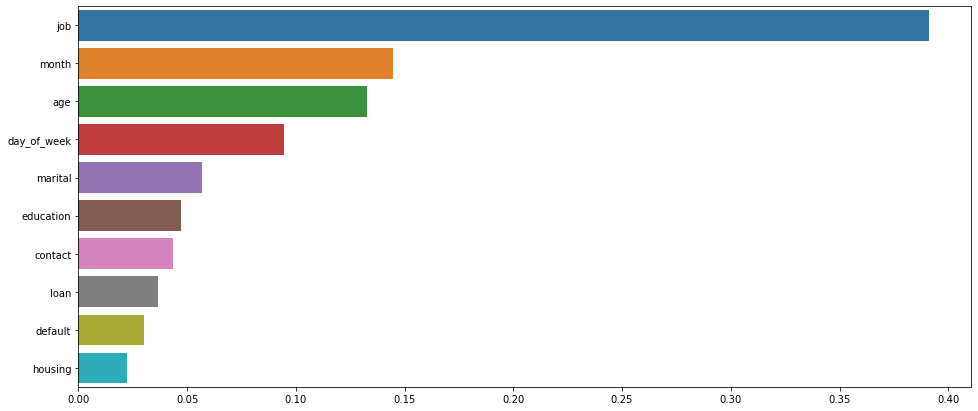

In [99]:
#нарисуйте график Feature Importance
#какие топ 3 фактора влияют на итоговую переменную y?

indices = np.argsort(model.feature_importances_)[::-1][:40]
g = sns.barplot(y=train.columns[indices][:40], x=model.feature_importances_[indices][:40]
                ,orient='h')

#отразим важные факторы для анализа потенциальных зависимостей в данных при всей выборке


# фильтрация признаков

In [100]:
#постройте модель итеративно выбирая лучшие показатели и добавляя только самые значимые переменные.
#сделайте модель на тооп 3 факторах из всего train
#посмотрите, какие наиболее значимые фактооры получились?

X_train, X_test, y_train, y_test = train_test_split(train[train.columns[:-1]], train['y'], test_size = 0.3, random_state=11)

factors = X_train[num_feats]

want_factors = 3
factor_result = {}
best_factors = []                                                    

for i in range(want_factors):
    factor_result[i] = {}                                                
    for factor in factors:
        fit_factors = [factor]
        fit_factors.extend(best_factors)
        rf = RandomForestClassifier(n_estimators=10, random_state=11)
        rf.fit(X_train[fit_factors], y_train)

        err_train = np.mean( y_train != rf.predict(X_train[fit_factors]))
        err_test = np.mean( y_test != rf.predict(X_test[fit_factors]))

        factor_result[i][factor] =  err_test
    # find best
    best_factors.append(pd.DataFrame(factor_result[i], index=[0]).T.sort_values(by=[0]).head(1).index[0])
#pd.DataFrame(factor_result, index=[0]).T.sort_values(by=[0]).head(10)
best_factors

['pdays', 'pdays', 'pdays']

# оценка значимых признаков по boxplot

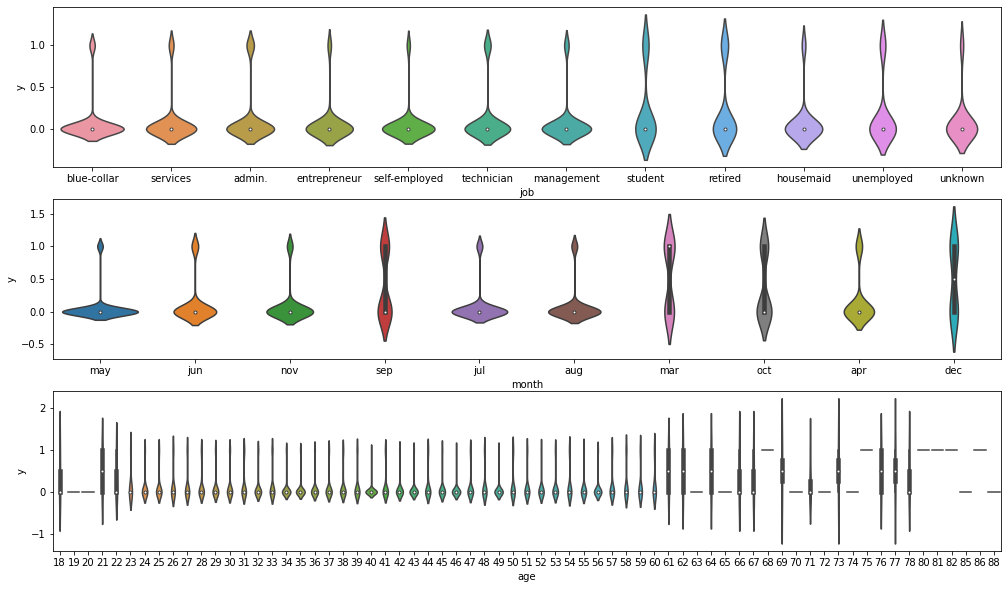

In [112]:
#нарисуйте ящики с усами отноосительно таргета по 3 значимым факторам из количественных переменных 
#и по 3 значимым факторам на основании добавления по лучшему фактору
#какие факторы лучше описывают зависимость от y?

fig, ax = plt.subplots(3, 1, figsize=(17,10))

for i in range(3):
    sns.violinplot(x=train.columns[indices][i], y='y', data=train, ax=ax[i])


# PLOTLY

In [13]:
df_game_log = pd.read_csv('C:/Course/xsolla/Git/Machine-learning-course-task/1_fullworkbook 2/dota_data/df_game_log_students.csv')

df_game_log.head()

,healthPercent,manaPercent,matchid,name,gameTime
0,100.0,100.0,5386235108,S1N1ST3R,167
1,100.0,100.0,5386235108,S1N1ST3R,169
2,100.0,100.0,5386235108,S1N1ST3R,170
3,100.0,100.0,5386235108,S1N1ST3R,171
4,100.0,100.0,5386235108,S1N1ST3R,172


In [ ]:
#https://pypi.org/project/plotly/
!pip install plotly

In [ ]:
%matplotlib inline
%pylab inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.graph_objects as goo
init_notebook_mode(connected=True)


In [ ]:
#найдите игру (matchid), где в течение игрового времени средний уровень жизни (healthPercent) максимальный
#что этоо за игра?



In [ ]:
#выведите график поведения healthPercent и manaPercent по данной игре
#на оси x выводите gameTime



# dsstack

In [ ]:
!pip install dstack


In [ ]:
#пример загрузки файла
import matplotlib.pyplot as plt
from dstack import create_frame

def line_plot(a):
    xs = range(0, 21)
    ys = [a * x for x in xs]
    fig = plt.figure()
    plt.axis([0, 20, 0, 20])
    plt.plot(xs, ys)
    return fig


frame = create_frame("line_plot")
coeff = [0.5, 1.0, 1.5, 2.0]

for c in coeff:
    frame.commit(line_plot(c), 
    f"Line plot with the coefficient of {c}", {"Coefficient": c})

frame.push()

In [ ]:
#загрузите полученный график по жизням и мане в выбранной игре через dstack и скиньте мне на него ссылку в телеграм :)
